In [1]:
import os
from matplotlib import pyplot as plt
import subprocess
import os
import numpy as np
import pandas as pd

In [2]:
algs=['blue', 'cobalt', 'cluster', 'random70']

In [3]:
def get_times_and_names(out_directory, alg):
    times=[]
    names=[]
    for filename in os.listdir(out_directory):
        if filename.endswith(".times") and filename.startswith(alg):
            print("now parsing "+filename)
            f= open(out_directory+filename, 'r') 
            for fh in f.readlines():
                y=fh.split()
                if len(y)>0 and y[0]=='real':
                    z=y[1]
                    m=float(z.split('m')[0])
                    s=float(z.split('m')[1].split('s')[0])
                    times.append(60*m+s)
            names_file=open(out_directory+filename[:-5]+"names",'r')
            names+=[l.strip() for l in names_file.readlines()]
    if len(times)==len(names):
        return list(zip( names,times))
    else:
        print(len(times))
        print(len(names))
        raise ValueError("didn't end up with same number of times and names")
        
    

In [4]:
out_directory="/n/home01/spetti/spetti_space/time_benchmark/seed/"
seed_pairs={}

for alg in algs:
    seed_pairs[alg]= get_times_and_names(out_directory,alg)
    print(alg)
    print(len(seed_pairs[alg]))
    
    
    

now parsing blue_2.times
now parsing blue_1.times
blue
18259
now parsing cobalt_1.times
now parsing cobalt_2.times
cobalt
18259
now parsing cluster_1.times
now parsing cluster_2.times
cluster
18259
now parsing random70_2.times
now parsing random70_1.times
random70
18259


In [5]:
out_directory="/n/home01/spetti/spetti_space/time_benchmark/full/"
full_pairs={}

for alg in algs:
    full_pairs[alg]= get_times_and_names(out_directory,alg)
    print(alg)
    print(len(full_pairs[alg]))
    

now parsing blue_big.times
now parsing blue.times
blue
18068
now parsing cobalt_big.times
now parsing cobalt.times
cobalt
18102
now parsing cluster_big.times
now parsing cluster.times
cluster
18102
now parsing random70.times
random70
18102


In [6]:
stat_path='/n/home01/spetti/spetti_space/pass_rate_benchmark/Pfam-A.seed.stats'
seed_data=[]
fh= open(stat_path, 'r') 
for line in fh.readlines():
    s= line.split()
    if s[0]!="#":
        seed_data.append((s[1],int(s[3]),int(s[4])))
fh.close()
print(len(seed_data))

18259


In [7]:
stat_path='/n/home01/spetti/spetti_space/pass_rate_benchmark/Pfam-A.full.stats'
full_data=[]
fh= open(stat_path, 'r') 
for line in fh.readlines():
    s= line.split()
    if s[0]!="#":
        full_data.append((s[1],int(s[3]),int(s[4])))
fh.close()
print(len(full_data))

18102


In [8]:
#sort by name
for alg in algs:
    seed_pairs[alg].sort(key=lambda tup:tup[0])
    full_pairs[alg].sort(key=lambda tup:tup[0])
    full_data.sort(key=lambda tup:tup[0])
    seed_data.sort(key=lambda tup:tup[0])

In [9]:
seed_tuples={}
for alg in algs:
    seed_tuples[alg]=[]
for i in range(len(seed_data)):
    name=seed_data[i][0]
    for alg in algs:
        if seed_pairs[alg][i][0]!=name:
            print(name)
            print(alg+" "+seed_pairs[alg][i][0])
            raise ValueError("not sorted properly or different name lists")
        else:
            seed_tuples[alg].append((seed_data[i][1],seed_data[i][2],seed_pairs[alg][i][1]))
for alg in algs:
    print(len(seed_tuples[alg]))

18259
18259
18259
18259


In [10]:
full_tuples={}
for alg in algs:
    full_tuples[alg]=[]

for alg in algs:
    for pair in full_pairs[alg]:
        c_name= pair[0]
        s=False
        for j in range(len(full_data)):
            name=full_data[j][0]
            if name==c_name:
                s=True
                i=j
                break    
        if s:    
            full_tuples[alg].append((full_data[i][1],full_data[i][2],pair[1]))
        else:
            raise ValueError(c_name+" not found in full_data")


for alg in algs:
    print(len(full_tuples[alg]))


18068
18102
18102
18102


In [11]:
tuples={}
for alg in algs:
    tuples[alg]=seed_tuples[alg]+full_tuples[alg]

In [14]:
#how many over a day
for alg in algs:
    nl=0
    print(alg)
    for x in tuples[alg]:
        if x[2]>60*60*24:
            nl+=1
    if alg=='blue':
        print(nl+34)
    else:
        print(nl)
    


blue
77
cobalt
1
cluster
2
random70
0


In [13]:
#maximum time
for alg in algs:
    print(alg)
    ms=max([x[2] for x in tuples[alg]])
    h=np.floor(ms/60/60)
    m=(ms/60/60-h )*60
    print(h, m)

blue
121.0 59.593633333333855
cobalt
46.0 25.866399999999885
cluster
37.0 17.472083333333615
random70
1.0 29.59921666666667


In [14]:
# families in full over a minute
#there are 18102 families in Pfam-A.full with at least one seq in alignment
for alg in algs[0:4]:
    print(alg)
    l=0
    for x in full_tuples[alg]:
        if x[2]<60:
            l+=1
    print(18102-l)
    print((18102-l)/18102.0*100)


blue
1422
7.855485581703679
cobalt
419
2.314661363385261
cluster
244
1.3479173571980996
random70
48
0.2651640702684786


In [15]:
color={}
color['blue']='tab:blue'
color['cobalt']='darkblue'
color['cluster']='tab:green'
color['random70']='tab:red'
names={}
names['blue']='(A) Blue'
names['cobalt']='(B) Cobalt'
names['cluster']='(C) Cluster'
names['random70']='(D) Independent Selection'

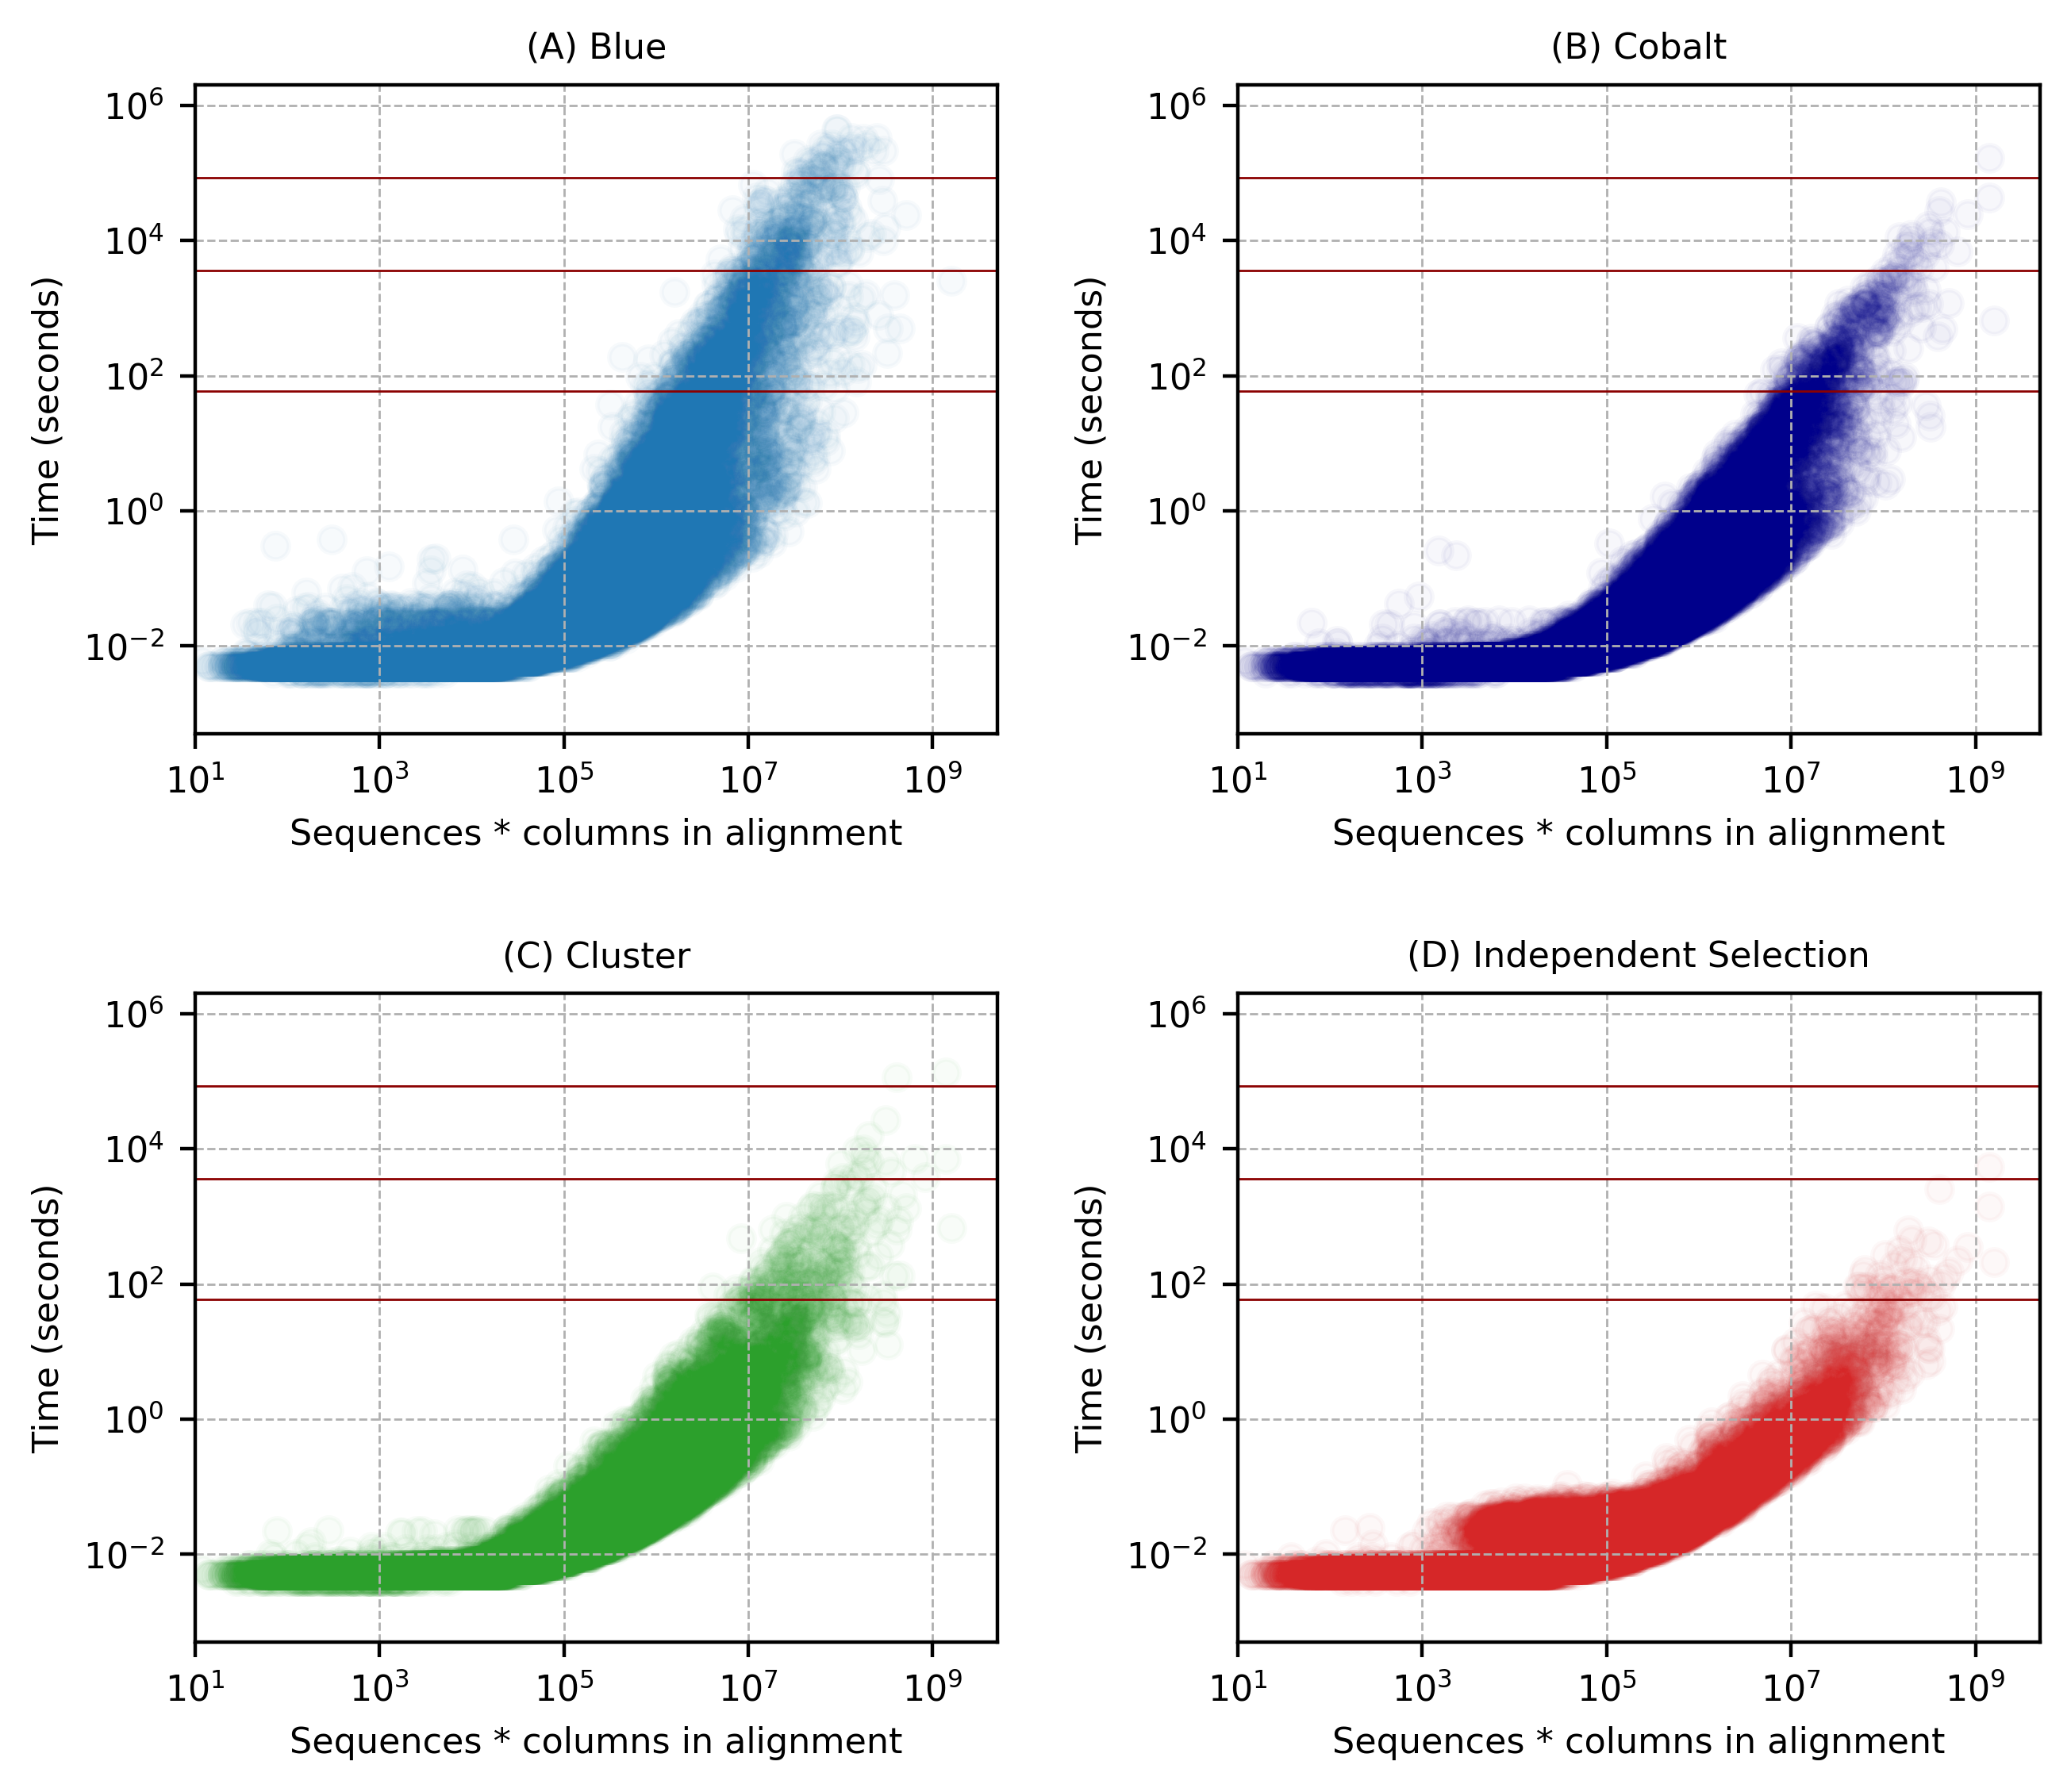

In [177]:
plt.figure( figsize=(7.5, 6.5), dpi=400)
plt.subplots_adjust(hspace=.4, wspace=.3)
i=1
for alg in algs:
    plt.subplot(220+i)
    i+=1
    plt.scatter([x[0]*x[1] for x in tuples[alg]], [x[2] for x in tuples[alg]], alpha=.03, c= color[alg])
    plt.hlines([60,3600,86400],10,5*10**9,linewidth=.5, color="darkred")
    plt.yscale('log')
    plt.xlim(10,5*10**9)
    plt.ylim(10**-3/2, 2*10**6)
    plt.xscale('log')
    plt.grid( linestyle='--', linewidth=.5)
    plt.xlabel("Sequences * columns in alignment",fontsize=8)
    plt.ylabel("Time (seconds)",fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(names[alg],fontsize=8)
    #plt.show()
plt.savefig("/n/home01/spetti/figures/time_ALL_ind.pdf")

In [16]:
alg_names={}
alg_names['blue']='4blue'
alg_names['cobalt']='3cobalt'
alg_names['cluster']='2cluster'
alg_names['random70']='1random70'

In [17]:
first=True
for alg in algs:
    if first:
        d=pd.DataFrame(tuples[alg],columns=['nseq', 'alen', 'seconds'])
        d['size']=[int(np.log10(d['nseq'][i]*d['alen'][i])) for i in range(len(d['nseq']))]
        d['alg']=[alg_names[alg] for i in range(len(d['nseq']))]
        c=pd.DataFrame(tuples[alg],columns=['nseq', 'alen', 'seconds'])
        c['size']=[int(np.log10(c['nseq'][i]*c['alen'][i])) for i in range(len(c['nseq']))]
        c['alg']=[alg_names[alg]+"fake" for i in range(len(c['nseq']))]
        d=d.append(c,ignore_index=True)
        first=False
    else:
        c=pd.DataFrame(tuples[alg],columns=['nseq', 'alen', 'seconds'])
        c['size']=[int(np.log10(c['nseq'][i]*c['alen'][i])) for i in range(len(c['nseq']))]
        c['alg']=[alg_names[alg] for i in range(len(c['nseq']))]
        print(len(c))
        print(len(d))
        print("merging")
        d=d.append(c,ignore_index=True)
        print(len(d))

        

36361
72654
merging
109015
36361
109015
merging
145376
36361
145376
merging
181737


In [32]:
#determine bins (of num seqs * num columns) of the 34 families that didn't finish under blue algorithm
for i in range(10):
    print(i)
    d9=d[d['size'] == i]
    print(d9.groupby(by='alg').agg('size'))

0
Series([], dtype: int64)
1
Series([], dtype: int64)
2
Series([], dtype: int64)
3
alg
1random70    10556
2cluster     10556
3cobalt      10556
4blue        10556
4bluefake    10556
dtype: int64
4
alg
1random70    9534
2cluster     9534
3cobalt      9534
4blue        9534
4bluefake    9534
dtype: int64
5
alg
1random70    6463
2cluster     6463
3cobalt      6463
4blue        6463
4bluefake    6463
dtype: int64
6
alg
1random70    3574
2cluster     3574
3cobalt      3574
4blue        3574
4bluefake    3574
dtype: int64
7
alg
1random70    944
2cluster     944
3cobalt      944
4blue        939
4bluefake    939
dtype: int64
8
alg
1random70    85
2cluster     85
3cobalt      85
4blue        58
4bluefake    58
dtype: int64
9
alg
1random70    3
2cluster     3
3cobalt      3
4blue        1
4bluefake    1
dtype: int64


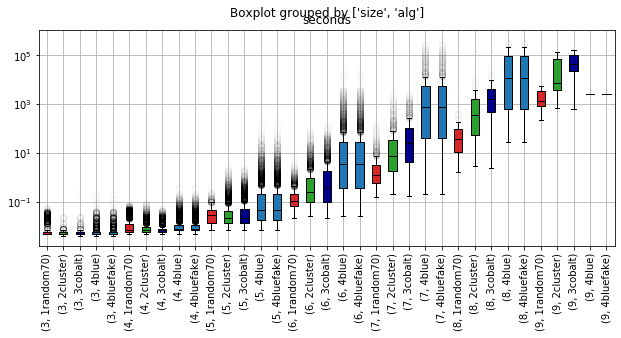

In [182]:
c='black'
myboxplot = d.boxplot(column=['seconds'],by=['size','alg'], rot=90, figsize=(10,4),  return_type = 'both',
                      whiskerprops = dict(c='black') , patch_artist = True)
plt.yscale('log')
colors = []
for i in range(9):
    colors+=['tab:red', 'tab:green', 'darkblue', 'tab:blue', 'tab:blue' ]
for row_key, (ax,row) in myboxplot.iteritems():
    ax.set_xlabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
        box.set_edgecolor('black')
for row_key, (ax,row) in myboxplot.iteritems():
    for w in row['whiskers']:
        #w.set_linewidth(20)
        w.set_color('black')
    for m in row['medians']:
        m.set_color('black')
    for f in row['fliers']:
        f.set_alpha(0.02)

plt.savefig("/n/home01/spetti/figures/bw_original.pdf")

In [ ]:
plt.figure( figsize=(7.5, 6.5), dpi=400)
plt.subplots_adjust(hspace=.4, wspace=.3)
i=1
for alg in algs:
    plt.subplot(220+i)
    i+=1
    plt.scatter([x[0]*x[1] for x in tuples[alg]], [x[2] for x in tuples[alg]], alpha=.03, c= color[alg])
    plt.hlines([60,3600,86400],10,5*10**9,linewidth=.5, color="darkred")
    plt.yscale('log')
    plt.xlim(10,5*10**9)
    plt.ylim(10**-3/2, 2*10**6)
    plt.xscale('log')
    plt.grid( linestyle='--', linewidth=.5)
    plt.xlabel("Sequences * columns in alignment",fontsize=8)
    plt.ylabel("Time (seconds)",fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(names[alg],fontsize=8)
    #plt.show()
plt.savefig("/n/home01/spetti/figures/time_ALL_ind.pdf")

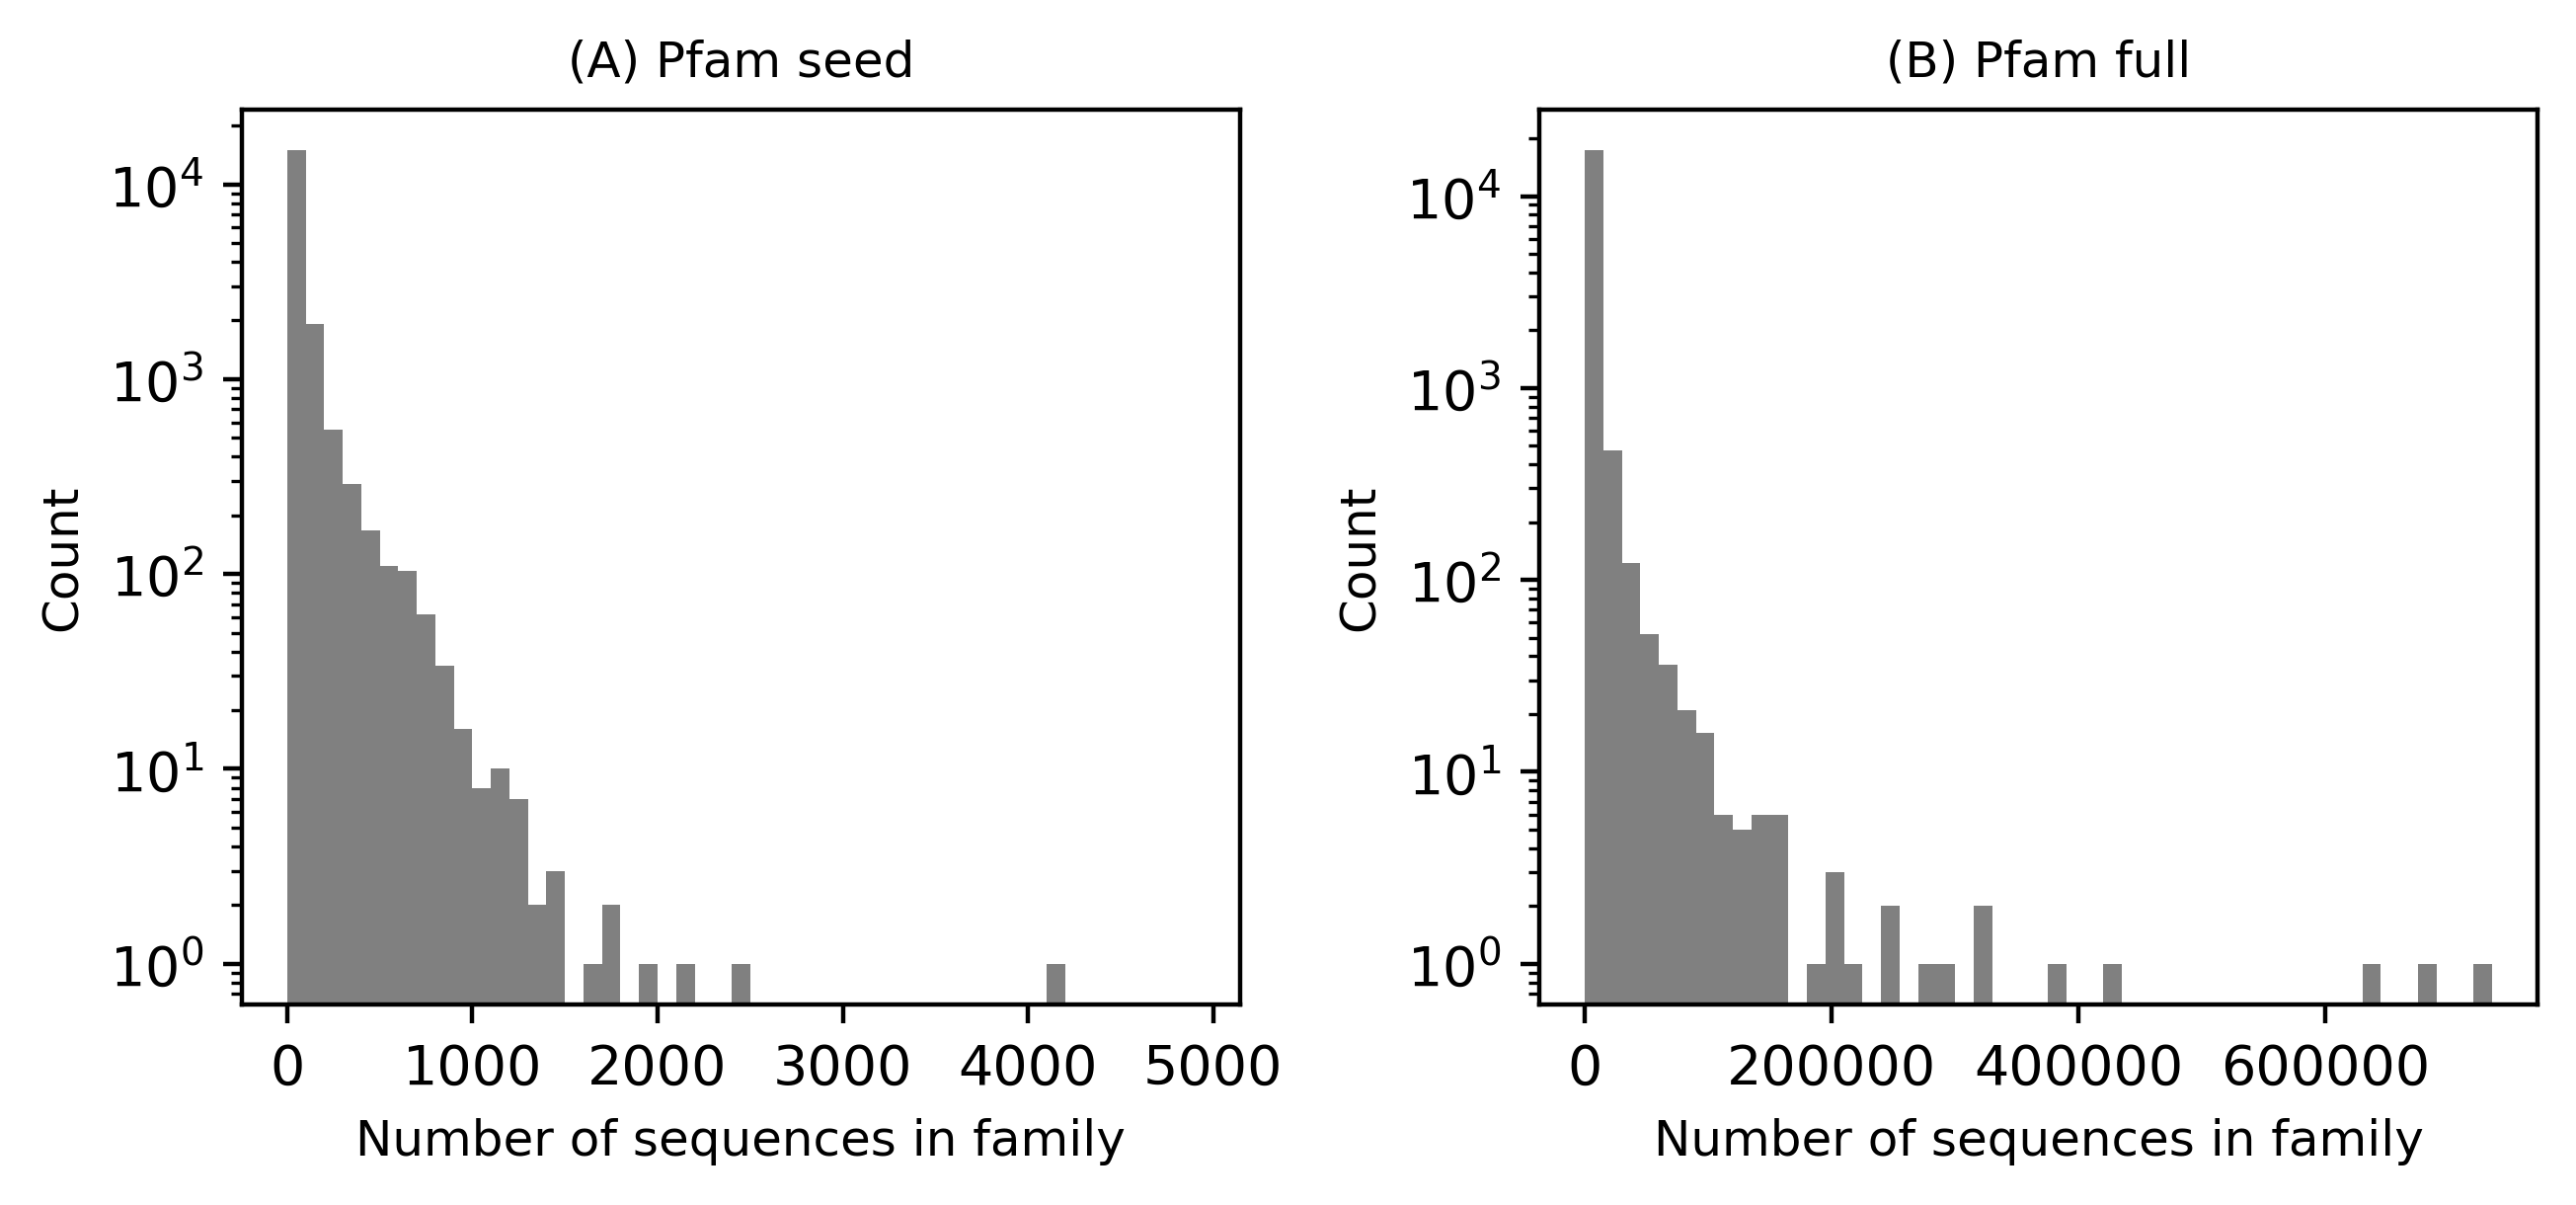

In [18]:
fs=9
plt.figure(figsize=(7.5, 3), dpi=400)
plt.subplots_adjust(wspace=.3)
plt.subplot(121)
plt.hist([x[1] for x in seed_data], log=True, bins=np.arange(0,5000,100), color="gray")
plt.xlabel("Number of sequences in family", fontsize=fs)
plt.ylabel("Count",fontsize=fs)
plt.title("(A) Pfam seed",fontsize=fs)
plt.subplot(122)
plt.hist([x[1] for x in full_data], log=True, bins=np.arange(0,750000,75000/5), color="gray")
plt.xlabel("Number of sequences in family",fontsize=fs)
plt.ylabel("Count",fontsize=fs)
plt.title("(B) Pfam full",fontsize=fs)
plt.savefig("/n/home01/spetti/figures/size_hists.pdf", bbox_inches='tight')